In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys, re, os

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.ensemble import RandomForestRegressor

In [2]:
%matplotlib inline

plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 11})

plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 300

In [3]:
# Change the work directory to the parent
try:
    if chdir:
        pass
except:
    current_dir = os.getcwd()
    os.chdir(current_dir +"/..")
    os.path.abspath(os.curdir)

In [4]:
chdir = True

In [5]:
import itertools
marker = itertools.cycle(('x',',', '+', '.', 'o', '*'))
cycol = itertools.cycle('bgrcmk')

# Service chain configuration

In [6]:
from IPython.display import IFrame
IFrame("../assets/testbed.png", width=850, height=480)

In [7]:
current_dir = os.getcwd()
file_path = os.path.abspath('../linear/datasets/resource_stimulus_global.csv')
#file_path = os.path.abspath('../linear/datasets/random_rates_exp-1.csv')
data = pd.read_csv(file_path, index_col=0)
data = data.replace(['<not counted>'], np.nan)
#data = data.drop('latency', axis=1)
df = data.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2239 entries, 0 to 45
Data columns (total 63 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   input_rate                          2239 non-null   float64
 1   output_rate                         2239 non-null   float64
 2   firewall_instructions               2239 non-null   float64
 3   nf_router_instructions              2239 non-null   float64
 4   ndpi_stats_instructions             2239 non-null   float64
 5   payload_scan_instructions           2239 non-null   float64
 6   bridge_instructions                 2239 non-null   float64
 7   firewall_branches                   2239 non-null   float64
 8   nf_router_branches                  2239 non-null   float64
 9   ndpi_stats_branches                 2239 non-null   float64
 10  payload_scan_branches               2239 non-null   float64
 11  bridge_branches                     2239 non-

In [8]:
corr = data.corr()
correlation_list = []
for i in range(1, 2):
    for j in range(i+1, len(corr.columns)):
        correlation_list.append((corr.columns[i], corr.columns[j], abs(corr.iloc[i, j])))


sorted_correlations = sorted(correlation_list, key=lambda x: x[2], reverse=True)

for correlation in sorted_correlations:
    print(f"Correlation between {correlation[0]} and {correlation[1]}: {correlation[2]:.2f}")

Correlation between output_rate and bridge_cache-references: 0.81
Correlation between output_rate and bridge_L1-dcache-load-misses: 0.81
Correlation between output_rate and bridge_LLC-loads: 0.80
Correlation between output_rate and bridge_LLC-stores: 0.80
Correlation between output_rate and payload_scan_LLC-stores: 0.74
Correlation between output_rate and payload_scan_cache-references: 0.73
Correlation between output_rate and payload_scan_L1-dcache-load-misses: 0.72
Correlation between output_rate and payload_scan_LLC-loads: 0.67
Correlation between output_rate and nf_router_LLC-stores: 0.60
Correlation between output_rate and nf_router_L1-dcache-load-misses: 0.58
Correlation between output_rate and nf_router_cache-references: 0.58
Correlation between output_rate and nf_router_LLC-loads: 0.55
Correlation between output_rate and latency: 0.54
Correlation between output_rate and firewall_LLC-loads: 0.54
Correlation between output_rate and ndpi_stats_cache-references: 0.46
Correlation bet

In [9]:
corr = data.corr()
correlation_list = []
for i in range(2,3):
    for j in range(i+1, len(corr.columns)):
        correlation_list.append((corr.columns[i], corr.columns[j], abs(corr.iloc[i, j])))


sorted_correlations = sorted(correlation_list, key=lambda x: x[2], reverse=True)

for correlation in sorted_correlations:
    print(f"Correlation between {correlation[0]} and {correlation[1]}: {correlation[2]:.2f}")

Correlation between firewall_instructions and firewall_branches: 1.00
Correlation between firewall_instructions and firewall_L1-dcache-loads: 1.00
Correlation between firewall_instructions and firewall_cycles: 1.00
Correlation between firewall_instructions and firewall_branch-misses: 1.00
Correlation between firewall_instructions and firewall_branch-load-misses: 1.00
Correlation between firewall_instructions and firewall_LLC-stores: 0.87
Correlation between firewall_instructions and firewall_L1-dcache-load-misses: 0.86
Correlation between firewall_instructions and firewall_cache-references: 0.85
Correlation between firewall_instructions and firewall_LLC-loads: 0.81
Correlation between firewall_instructions and ndpi_stats_cache-references: 0.60
Correlation between firewall_instructions and ndpi_stats_LLC-loads: 0.59
Correlation between firewall_instructions and ndpi_stats_LLC-stores: 0.59
Correlation between firewall_instructions and ndpi_stats_L1-dcache-load-misses: 0.58
Correlation be

# slomo

In [10]:
current_dir = os.getcwd()
file_path = os.path.abspath('../linear/datasets/load_stimulus_global.csv')
file_path = os.path.abspath('../linear/datasets/random_rates_exp-1.csv')
file_path = os.path.abspath('../linear/datasets/resource_stimulus_global.csv')
data = pd.read_csv(file_path, index_col=0)
data = data.replace(['<not counted>'], np.nan)
#data = data.drop('latency', axis=1)
df = data.dropna()

In [11]:
# training  
from sklearn.ensemble import GradientBoostingRegressor 
X = df.drop(['input_rate','output_rate', 'latency','firewall_cycles','payload_scan_cycles','ndpi_stats_branch-load-misses',
             'nf_router_cycles','bridge_cycles','payload_scan_LLC-load-misses','payload_scan_LLC-load-misses','bridge_LLC-load-misses',
             'bridge_cache-misses','bridge_cache-misses','nf_router_cache-misses','firewall_cache-misses','nf_router_LLC-load-misses',
             'ndpi_stats_LLC-load-misses','nf_router_branch-load-misses','nf_router_branch-misses','payload_scan_branch-load-misses',
             'payload_scan_branch-misses','bridge_branch-misses','ndpi_stats_branch-load-misses','ndpi_stats_cache-misses','firewall_branch-misses'], axis=1)
#X = df.drop(['input_rate','output_rate', 'latency'], axis=1)
y = df['output_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# ML model
model = DecisionTreeRegressor(random_state=0)
#model = LinearRegression()
#model = RandomForestRegressor(n_estimators=100, random_state=42)
model = GradientBoostingRegressor()
# train the regressor
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#accuracy
threshold = 0.05 
distances = [abs(real - pred) / real for real, pred in zip(y_test.values.tolist(), y_pred)]
accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
print("Accuracy within 5% threshold:", accuracy_within_threshold)


accuracy_cdf=[]
for threshold in range(11):
    threshold = threshold/10
    distances = [abs(real - pred) / real for real, pred in zip(y_test.values.tolist(), y_pred)]
    accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
    accuracy_cdf.append(accuracy_within_threshold)
print(accuracy_cdf)

Accuracy within 5% threshold: 70.38690476190477
[0.0, 83.03571428571429, 90.77380952380952, 93.00595238095238, 95.08928571428571, 96.27976190476191, 97.91666666666666, 98.21428571428571, 98.36309523809523, 98.36309523809523, 98.51190476190477]


In [12]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.8353768936577545


In [13]:
# SMAPE (Symmetric Mean Absolute Percentage Error)
smape = np.mean(2 * np.abs(y_pred - y_test) / (np.abs(y_test) + np.abs(y_pred))) * 100
print("SMAPE (Symmetric Mean Absolute Percentage Error):", smape)

SMAPE (Symmetric Mean Absolute Percentage Error): 7.611891049615734


# Dobrescu

In [14]:
current_dir = os.getcwd()
file_path = os.path.abspath('../linear/datasets/load_stimulus_global.csv')
file_path = os.path.abspath('../linear/datasets/random_rates_exp-1.csv')
file_path = os.path.abspath('../linear/datasets/resource_stimulus_global.csv')
data = pd.read_csv(file_path, index_col=0)
data = data.replace(['<not counted>'], np.nan)
#data = data.drop('latency', axis=1)
df = data.dropna()

In [15]:
# training  
from sklearn.ensemble import GradientBoostingRegressor 
columns_to_include = ['firewall_cache-references', 'nf_router_cache-references', 'ndpi_stats_cache-references', 'payload_scan_cache-references', 'bridge_cache-references']
X = df[columns_to_include]
y = df['output_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# ML model
#model = DecisionTreeRegressor(random_state=0)
model = LinearRegression()
#model = RandomForestRegressor(n_estimators=100, random_state=42)
model = GradientBoostingRegressor()

# train the regressor
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#accuracy
threshold = 0.05 
distances = [abs(real - pred) / real for real, pred in zip(y_test.values.tolist(), y_pred)]
accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
print("Accuracy within 5% threshold:", accuracy_within_threshold)


accuracy_cdf=[]
for threshold in range(11):
    threshold = threshold/10
    distances = [abs(real - pred) / real for real, pred in zip(y_test.values.tolist(), y_pred)]
    accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
    accuracy_cdf.append(accuracy_within_threshold)
print(accuracy_cdf)

Accuracy within 5% threshold: 69.19642857142857
[0.0, 78.27380952380952, 86.90476190476191, 91.66666666666666, 93.89880952380952, 94.49404761904762, 95.83333333333334, 96.57738095238095, 96.72619047619048, 97.02380952380952, 97.17261904761905]


In [16]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.7515068604088833


In [17]:
# SMAPE (Symmetric Mean Absolute Percentage Error)
smape = np.mean(2 * np.abs(y_pred - y_test) / (np.abs(y_test) + np.abs(y_pred))) * 100
print("SMAPE (Symmetric Mean Absolute Percentage Error):", smape)

SMAPE (Symmetric Mean Absolute Percentage Error): 10.082959443449498


# DNN to predict rate (training set: global)

In [79]:
current_dir = os.getcwd()
file_path = os.path.abspath('../linear/datasets/load_stimulus_global.csv')
file_path = os.path.abspath('../linear/datasets/random_rates_exp-1.csv')
file_path = os.path.abspath('../linear/datasets/resource_stimulus_global.csv')
data = pd.read_csv(file_path, index_col=0)
data = data.replace(['<not counted>'], np.nan)
#data = data.drop('latency', axis=1)
df = data.dropna()

In [80]:
# data set
# load_stimulus_global.csv: exp1_exp10
# load_stimulus_global_1.csv:exp1_exp10+fixed_5000+fixed_7500
# load_stimulus_global_2.csv:exp1_exp10+fixed_5000+fixed_7500+random
# load_stimulus_global_3.csv:exp1_exp10+random
#load_stimulus_global_4.csv:exp1_exp10+stage_random
# performance: global>3>2>1

In [81]:
# training 
X = df.drop(['input_rate','output_rate', 'latency'], axis=1)
X = df.drop(['input_rate','output_rate', 'latency','firewall_cycles','payload_scan_cycles','ndpi_stats_branch-load-misses',
             'nf_router_cycles','bridge_cycles','payload_scan_LLC-load-misses','payload_scan_LLC-load-misses','bridge_LLC-load-misses',
         'bridge_cache-misses','bridge_cache-misses','nf_router_cache-misses','firewall_cache-misses','nf_router_LLC-load-misses',
             'ndpi_stats_LLC-load-misses','nf_router_branch-load-misses','nf_router_branch-misses','payload_scan_branch-load-misses',
             'payload_scan_branch-misses','bridge_branch-misses','ndpi_stats_branch-load-misses','ndpi_stats_cache-misses','firewall_branch-misses'], axis=1)

y = df['output_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

column_order = X_train.columns
X_test = X_test[column_order]


# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(len(y))

2239


In [82]:
# model
model = Sequential()

# Add input layer and hidden layers
model.add(Dense(64, activation='sigmoid', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))

# Add output layer
model.add(Dense(1))#,activation ='sigmoid'))

In [83]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=8, epochs=100, verbose=1)

Epoch 1/100
196/196 [==============================] - 1s 3ms/step - loss: 1098837.0000
Epoch 2/100
196/196 [==============================] - 1s 4ms/step - loss: 153983.7656
Epoch 3/100
196/196 [==============================] - 1s 3ms/step - loss: 118448.8438
Epoch 4/100
196/196 [==============================] - 1s 3ms/step - loss: 109093.1562
Epoch 5/100
196/196 [==============================] - 1s 3ms/step - loss: 106501.4453
Epoch 6/100
196/196 [==============================] - 1s 3ms/step - loss: 102965.7422
Epoch 7/100
196/196 [==============================] - 1s 3ms/step - loss: 98599.3125
Epoch 8/100
196/196 [==============================] - 1s 3ms/step - loss: 101213.8281
Epoch 9/100
196/196 [==============================] - 1s 3ms/step - loss: 96028.6328
Epoch 10/100
196/196 [==============================] - 1s 3ms/step - loss: 93862.2578
Epoch 11/100
196/196 [==============================] - 1s 3ms/step - loss: 92604.7969
Epoch 12/100
196/196 [======================

21/21 [==============================] - 0s 1ms/step
[0.0, 75.89285714285714, 88.98809523809523, 92.85714285714286, 94.94047619047619, 95.68452380952381, 96.72619047619048, 97.61904761904762, 98.06547619047619, 98.36309523809523, 98.51190476190477]


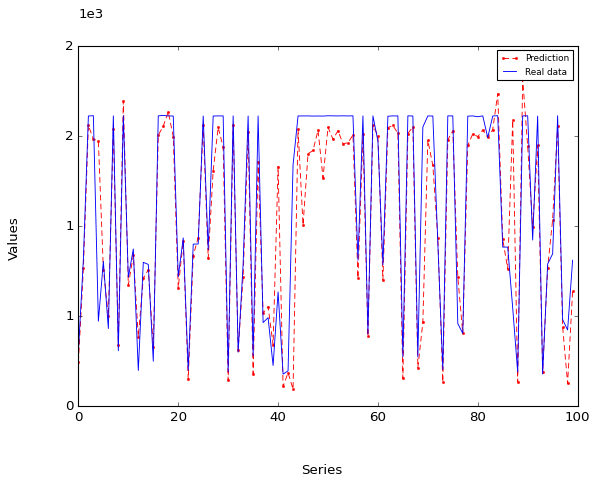

In [84]:
# Make predictions on the test set
import matplotlib.ticker as mticker

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# accuracy
threshold = 0.05  
y_pred=np.array(y_pred)
y_pred = [item for subset in y_pred for item in subset]
y_test=np.array(y_test)
distances = [abs(real - pred) / real for real, pred in zip(y_test, y_pred)]
accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
accuracy_cdf=[]
# plot cdf of accurancy
for threshold in range(11):
    threshold = threshold/10
    distances = [abs(real - pred) / real for real, pred in zip(y_test, y_pred)]
    accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
    accuracy_cdf.append(accuracy_within_threshold)
print(accuracy_cdf)

# plot

fig, ax = plt.subplots(facecolor='white', figsize=(8,6))
#ax.set_facecolor('white')
plt.style.use('classic')

plt.plot(y_pred[0:100], marker='o',c='r',markersize = 2, linewidth = 0.8, linestyle='-', markeredgecolor='red', dashes=(5, 3),label='Prediction')
plt.plot(y_test.tolist()[0:100], c='b',linestyle='-',linewidth = 0.8,label='Real data')


plt.legend(loc="upper right", fontsize=8)
fig.text(0.5, 0.01, 'Series', size='12', ha='center')
fig.text(0.01, 0.5, 'Values', size='12', va='center', rotation='vertical')
plt.subplots_adjust(left=0.12, right=0.9, bottom=0.15, top=0.9, wspace=0.3, hspace=0.4)
#plt.grid()
ax.set_facecolor('white')

# Set y-axis tick format
formatter = mticker.FuncFormatter(lambda x, pos: f"{int(x/1000)}")
ax.yaxis.set_major_formatter(formatter)
# Set text in the upper left corner of the figure
fig.text(0.12, 0.98, '1e3', size='12', ha='left', va='top')

#save figure
#folder_path = 'figure/rate_prediction'
#if not os.path.exists(folder_path):
#    os.makedirs(folder_path)
#file_path = os.path.join(folder_path, 'accuracy-linear.pdf' )
#plt.savefig(file_path)

plt.show()

In [85]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.8149034202021023


In [9]:
# Some helper functions
def get_stat(stat_name, source="general/fastclick-varied-cbr-rates.csv", index=1):
    stat = []
    with open(source) as file:
        for line in file:
            if re.search(stat_name, line):
                stat.append(line.strip().split(',')[index])
    
    return list(map(lambda x:float(x), stat[:-1]))

def plot_stat(stat_name, ax, source, index=1):
    stat = get_stat(stat_name, source, index)
    ax.plot(stat)
    ax.grid(True)
    ax.set_title(stat_name)

def plot_stats(stat_names, source="fastclick-varied-cbr-rates.csv", index=1):
    i = 1
    fig, ax = plt.subplots(len(stat_names),2)
    for s in stat_names:
        ax = plt.subplot(len(stat_names),1, i)
        plot_stat(s, ax, source, index)
        i+=1
    fig.tight_layout()
    

In [10]:
def parse_seq(exp_type, exp_num, file, index=5):
    "Parse sequential data, specialized for the TX/RX/Latency experiments"
    tmp = []
    
    if file.startswith("latency.csv"):
        with open(os.path.join("..\\linear\\data_modify_latency", exp_type, exp_num, file)) as f:
            lines = f.readlines()[4:] if exp_type == "load_stimulus" else f.readlines()
            for i in range(len(lines)):
                if i % 2 != 0:  # Check if the index is odd
                    value = float(lines[i].strip()) / 1000
                    tmp.append(value)
    else:
        with open(os.path.join("..\\linear\\data_modify_latency", exp_type, exp_num, file)) as f:
            next(f)
            for l in f:
                try:
                    value = float(l.strip().split(",")[index])
                except ValueError:
                    value = "N/A"
                tmp.append(value)
                
    return tmp

In [11]:
def parse_reg(exp_type, exp_num, file, stat_name, index=1):
    "Parse the Perf data"
    stat = []
    with open(os.path.join("..\\linear\\data_modify_latency", exp_type, exp_num, file)) as f:
        for line in f:
            if re.search(stat_name, line):
                stat.append(line.strip().split(',')[index])
    
    return list(map(lambda x:float(x), stat[:-1]))

In [12]:
# Metadata for specific SFC configurations
exp_rs = "exp-4-3-2"
vnfs = ["firewall.csv", "nf_router.csv", "ndpi_stats.csv", "payload_scan.csv", "bridge.csv"]

In [13]:

import matplotlib.ticker as mticker

# read the CSV file
path = '../linear/datasets/resource_stimulus_exp-5-3-2.csv'

df = pd.read_csv(path)
df = df.replace(['<not counted>'], np.nan)
df = df.dropna()

# separate the features and target variable


# Now you can access the 'columns' attribute
#X_test = df.drop(['Unnamed: 0','input_rate','latency'], axis=1)
X_test = df.drop(['input_rate','latency', 'nf_router_LLC-load-misses','nf_router_cache-misses',\
             'firewall_LLC-load-misses','ndpi_stats_cache-misses','ndpi_stats_LLC-load-misses','bridge_cache-misses',\
             'bridge_instructions','bridge_branches','firewall_instructions' ], axis=1)

X_test =df.drop(['Unnamed: 0','input_rate','output_rate', 'latency','firewall_cycles','payload_scan_cycles','ndpi_stats_branch-load-misses',
             'nf_router_cycles','bridge_cycles','payload_scan_LLC-load-misses','payload_scan_LLC-load-misses','bridge_LLC-load-misses',
             'bridge_cache-misses','bridge_cache-misses','nf_router_cache-misses','firewall_cache-misses','nf_router_LLC-load-misses',
             'ndpi_stats_LLC-load-misses','nf_router_branch-load-misses','nf_router_branch-misses','payload_scan_branch-load-misses',
             'payload_scan_branch-misses','bridge_branch-misses','ndpi_stats_branch-load-misses','ndpi_stats_cache-misses','firewall_branch-misses'], axis=1)
y_test =df['output_rate'].values

# standardize the features
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)

# evaluate
y_pred = model.predict(X_test)
y_pred = np.array(y_pred)
mse = mean_squared_error(y_test, y_pred)

# accuracy
threshold = 0.05
distances = [abs(real - pred) / real for real, pred in zip(y_test, y_pred)]
accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
print(f'accurancy with thoreshold 5%:{accuracy_within_threshold}')

accuracy_cdf=[]
# plot cdf of accurancy
for threshold in range(11):
    threshold = threshold/10
    distances = [abs(real - pred) / real for real, pred in zip(y_test, y_pred)]
    accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
    accuracy_cdf.append(accuracy_within_threshold)
print(accuracy_cdf)

# plot

fig, ax = plt.subplots(facecolor='white', figsize=(4,3))
#ax.set_facecolor('white')
plt.style.use('classic')

plt.plot(y_pred, marker='o', c='r',markersize = 2,linewidth = 0.8,  markeredgecolor='red', linestyle='-', dashes=(5, 3),label='Prediction')
plt.plot(y_test.tolist(), c='b',linestyle='-',linewidth = 0.8, label='Real')

plt.legend(loc="upper right", fontsize=10)
fig.text(0.5, 0.01, 'Series', size='14', ha='center')
fig.text(0.01, 0.5, 'Values', size='14', va='center', rotation='vertical')
plt.subplots_adjust(left=0.12, right=0.9, bottom=0.15, top=0.9, wspace=0.3, hspace=0.4)
#plt.grid()
ax.set_facecolor('white')

# Set x-axis and y-axis limits
plt.xlim(0, 45)


# Set y-axis tick format
formatter = mticker.FuncFormatter(lambda x, pos: f"{x/10000:.0e}")
ax.yaxis.set_major_formatter(formatter)
# Set text in the upper left corner of the figure
fig.text(0.12, 0.98, '1e4', size='12', ha='left', va='top')



#save figure
folder_path = 'figure/latency_prediction'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)
file_path = os.path.join(folder_path, 'accuracy-latency-linear-resource.pdf' )
plt.savefig(file_path)
plt.show()
print(y_pred)
print(y_test)

NameError: name 'model' is not defined

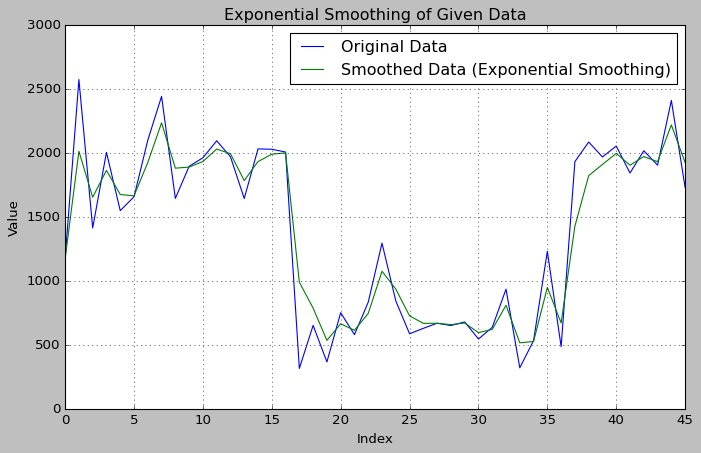

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
data = np.array([[1173.7627], [2573.966], [1414.3655], [2004.869], [1549.7444], [1657.911], [2100.1404], [2442.1973],
                 [1645.363], [1895.81], [1962.7091], [2095.5156], [1970.5], [1644.5054], [2031.8918], [2029.2957],
                 [2007.5258], [317.1517], [653.2517], [367.75052], [752.3645], [580.7274], [834.7406], [1295.8524],
                 [844.34326], [587.79193], [630.1625], [670.1111], [652.05554], [680.1848], [546.81256], [637.83624],
                 [936.13947], [322.00922], [534.2766], [1231.9163], [486.726], [1932.815], [2085.8286], [1969.0575],
                 [2054.2244], [1843.4702], [2017.3947], [1905.1425], [2411.0583], [1730.2142]])

def exponential_smoothing(data, alpha):
    smoothed_data = [data[0]]
    for i in range(1, len(data)):
        smoothed_value = alpha * data[i] + (1 - alpha) * smoothed_data[-1]
        smoothed_data.append(smoothed_value)
    return np.array(smoothed_data)

# Applying exponential smoothing with alpha = 0.3 (You can adjust the alpha value as needed)
alpha = 0.6
smoothed_data = exponential_smoothing(data, alpha)

# Plotting the original data and smoothed data
plt.figure(figsize=(10, 6))
plt.plot(data, label='Original Data')
plt.plot(smoothed_data, label='Smoothed Data (Exponential Smoothing)')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Exponential Smoothing of Given Data')
plt.grid(True)
plt.show()


C:\Users\Qiong\AppData\Local\Temp\ipykernel_18708\3378068765.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(left_y_vals)
C:\Users\Qiong\AppData\Local\Temp\ipykernel_18708\3378068765.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(right_y_vals)


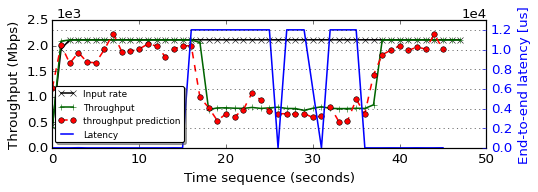

In [22]:
fig, ax = plt.subplots(facecolor='white', figsize=(7,2))
plt.style.use('classic')
#ax.grid(True)

line_width = 1.4


ax.set_xlabel("Time sequence (seconds)")
ax.set_ylabel("Throughput (Mbps)")

ax2 = ax.twinx()
ax2.tick_params(axis='y', colors='blue')
ax2.set_ylabel("End-to-end latency [us]", color="blue")

l = ax.plot(parse_seq("resource_stimulus", exp_rs, "tx_stats.csv"), color='black', label="Input rate", linewidth=line_width, marker='x', markerfacecolor='black', markeredgecolor='black')
l1 = ax.plot(parse_seq("resource_stimulus", exp_rs, "rx_stats.csv"), color='darkgreen', marker='+', label="Throughput", linewidth=line_width, markerfacecolor='darkgreen', markeredgecolor='darkgreen')
l2 = ax.plot(smoothed_data, color="red", label="throughput prediction", marker=next(marker), linestyle="dashed", markersize=10, markerfacecolor='red', markeredgecolor='black', linewidth=line_width)


lat = parse_seq("resource_stimulus", exp_rs, "latency.csv")
l3 = ax2.plot(np.arange(0, len(lat)), lat, color="blue", label="Latency",linewidth=line_width,)

lns = l + l1 + l2 + l3
labs = [l.get_label() for l in lns]
ax2.set_ylim(0, 1.3e4)

# Divide left y-axis values by 1000
left_y_vals = ax.get_yticks() / 1000
ax.set_yticklabels(left_y_vals)

# Divide right y-axis values by 10000
right_y_vals = ax2.get_yticks() / 10000
ax2.set_yticklabels(right_y_vals)

plt.grid()
# Add labels in the top corners
ax.text(0.01, 1.1, "1e3", transform=ax.transAxes, ha="left", va="top")
ax2.text(1, 1.1, "1e4", transform=ax2.transAxes, ha="right", va="top")
legend = plt.legend(lns, labs, loc='lower left', fontsize=8, bbox_to_anchor=(-0.005, 0.01), fancybox=True, shadow=True)
plt.savefig('resource_throughput_prediction_new.pdf', bbox_inches='tight')

